<a href="https://colab.research.google.com/github/Prabeshrayamajhi/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customer Segmentation**

# **🎯 Main Objective**

The primary objective of this analysis is to apply unsupervised learning techniques—specifically clustering and dimensionality reduction—on a real-world customer dataset to identify distinct customer segments based on their purchasing behavior.

By uncovering natural groupings in the data, this analysis aims to support marketing and business strategy by:

* Identifying high-value customer segments.
* Enabling personalized marketing approaches.
* Informing decisions around resource allocation and product targeting.
<br>
<br>

# **🧠 Methodological Focus**

This project focuses on clustering as the primary modeling technique. Additionally, dimensionality reduction (using PCA) will be explored to visualize the structure of the dataset and understand which features contribute most to the variation across customers.

The value to stakeholders lies in:

* Translating data into actionable business insights.
* Helping the business better understand its customer base without prior labels.
* Providing recommendations based on segment characteristics.

The final outcome will include:

* A comparison of clustering models (e.g., K-Means, DBSCAN, Hierarchical).
* Evaluation of the best-fit model.
* Visual insights using reduced dimensions (e.g., PCA).

# **📁 Dataset Description**

The dataset used for this project is the Mall Customers Segmentation Data sourced from Kaggle.

# 📌 Context
This dataset contains demographic and behavioral data for 200 mall customers. It is commonly used for customer segmentation and clustering exercises due to its simplicity and real-world applicability.

# 📊 Dataset Features
The dataset includes the following columns:

* CustomerID: Unique identifier for each customer.
* Gender: Categorical variable indicating the customer’s gender (Male/Female).
* Age: Age of the customer in years.
* Annual Income (k$): Annual income of the customer in thousands of dollars.
* Spending Score (1–100): A score assigned by the mall based on customer spending behavior and purchasing data.

# 📌 Objective with this Dataset
The aim is to:

* Explore the characteristics of the customers.
* Identify meaningful clusters based on their demographic and spending behavior.
* Provide visual and interpretive insights to stakeholders to inform marketing decisions.

We will now proceed to load and preview the data before cleaning and preprocessing it for analysis.

# Importing the Dependencies


In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score



## Data Collection and Analysis

In [119]:
# Loading the data from csv file to a Pandas DataFrame
df=pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [120]:
#Displaying first 5 rows in a data frame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [122]:
#Checking the missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [123]:
# Drop CustomerID
df= df.drop('CustomerID', axis=1)
# Preview cleaned data
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data Visualization

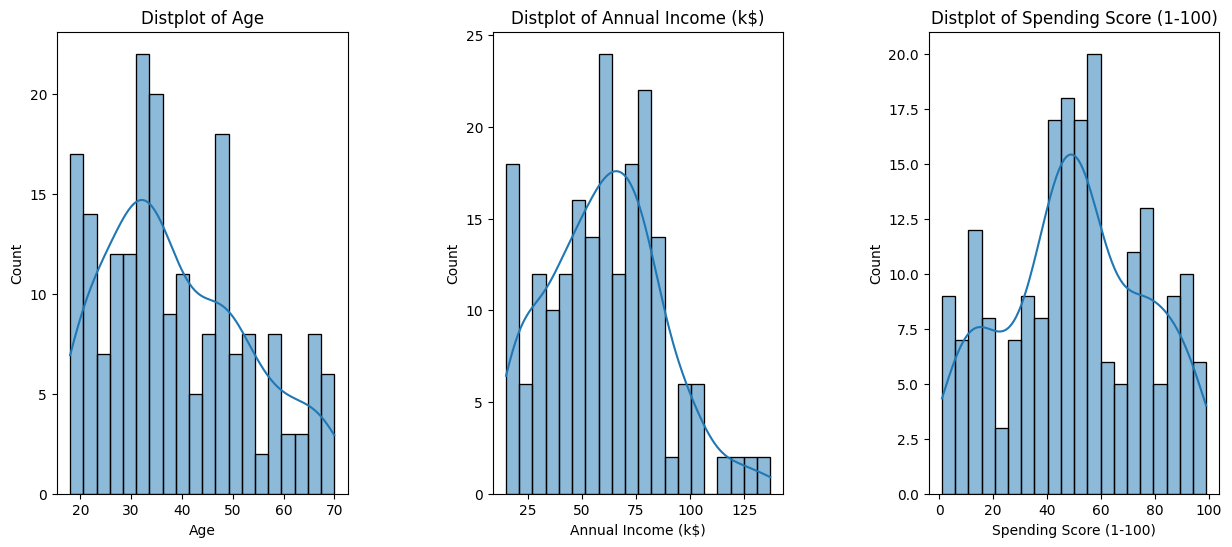

In [124]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20,kde=True)
    plt.title('Distplot of {}'.format(x))
plt.show()


### Count Plot of Gender

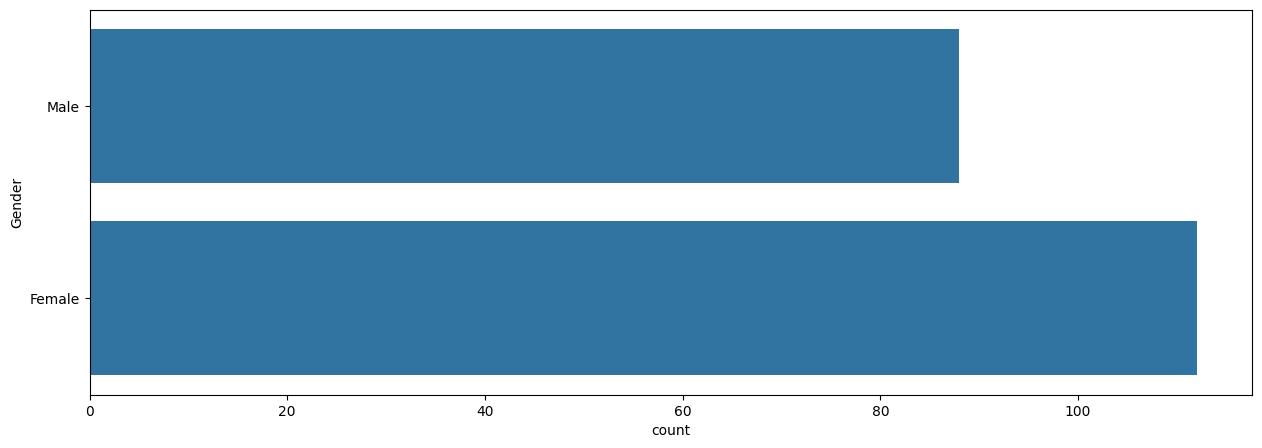

In [125]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

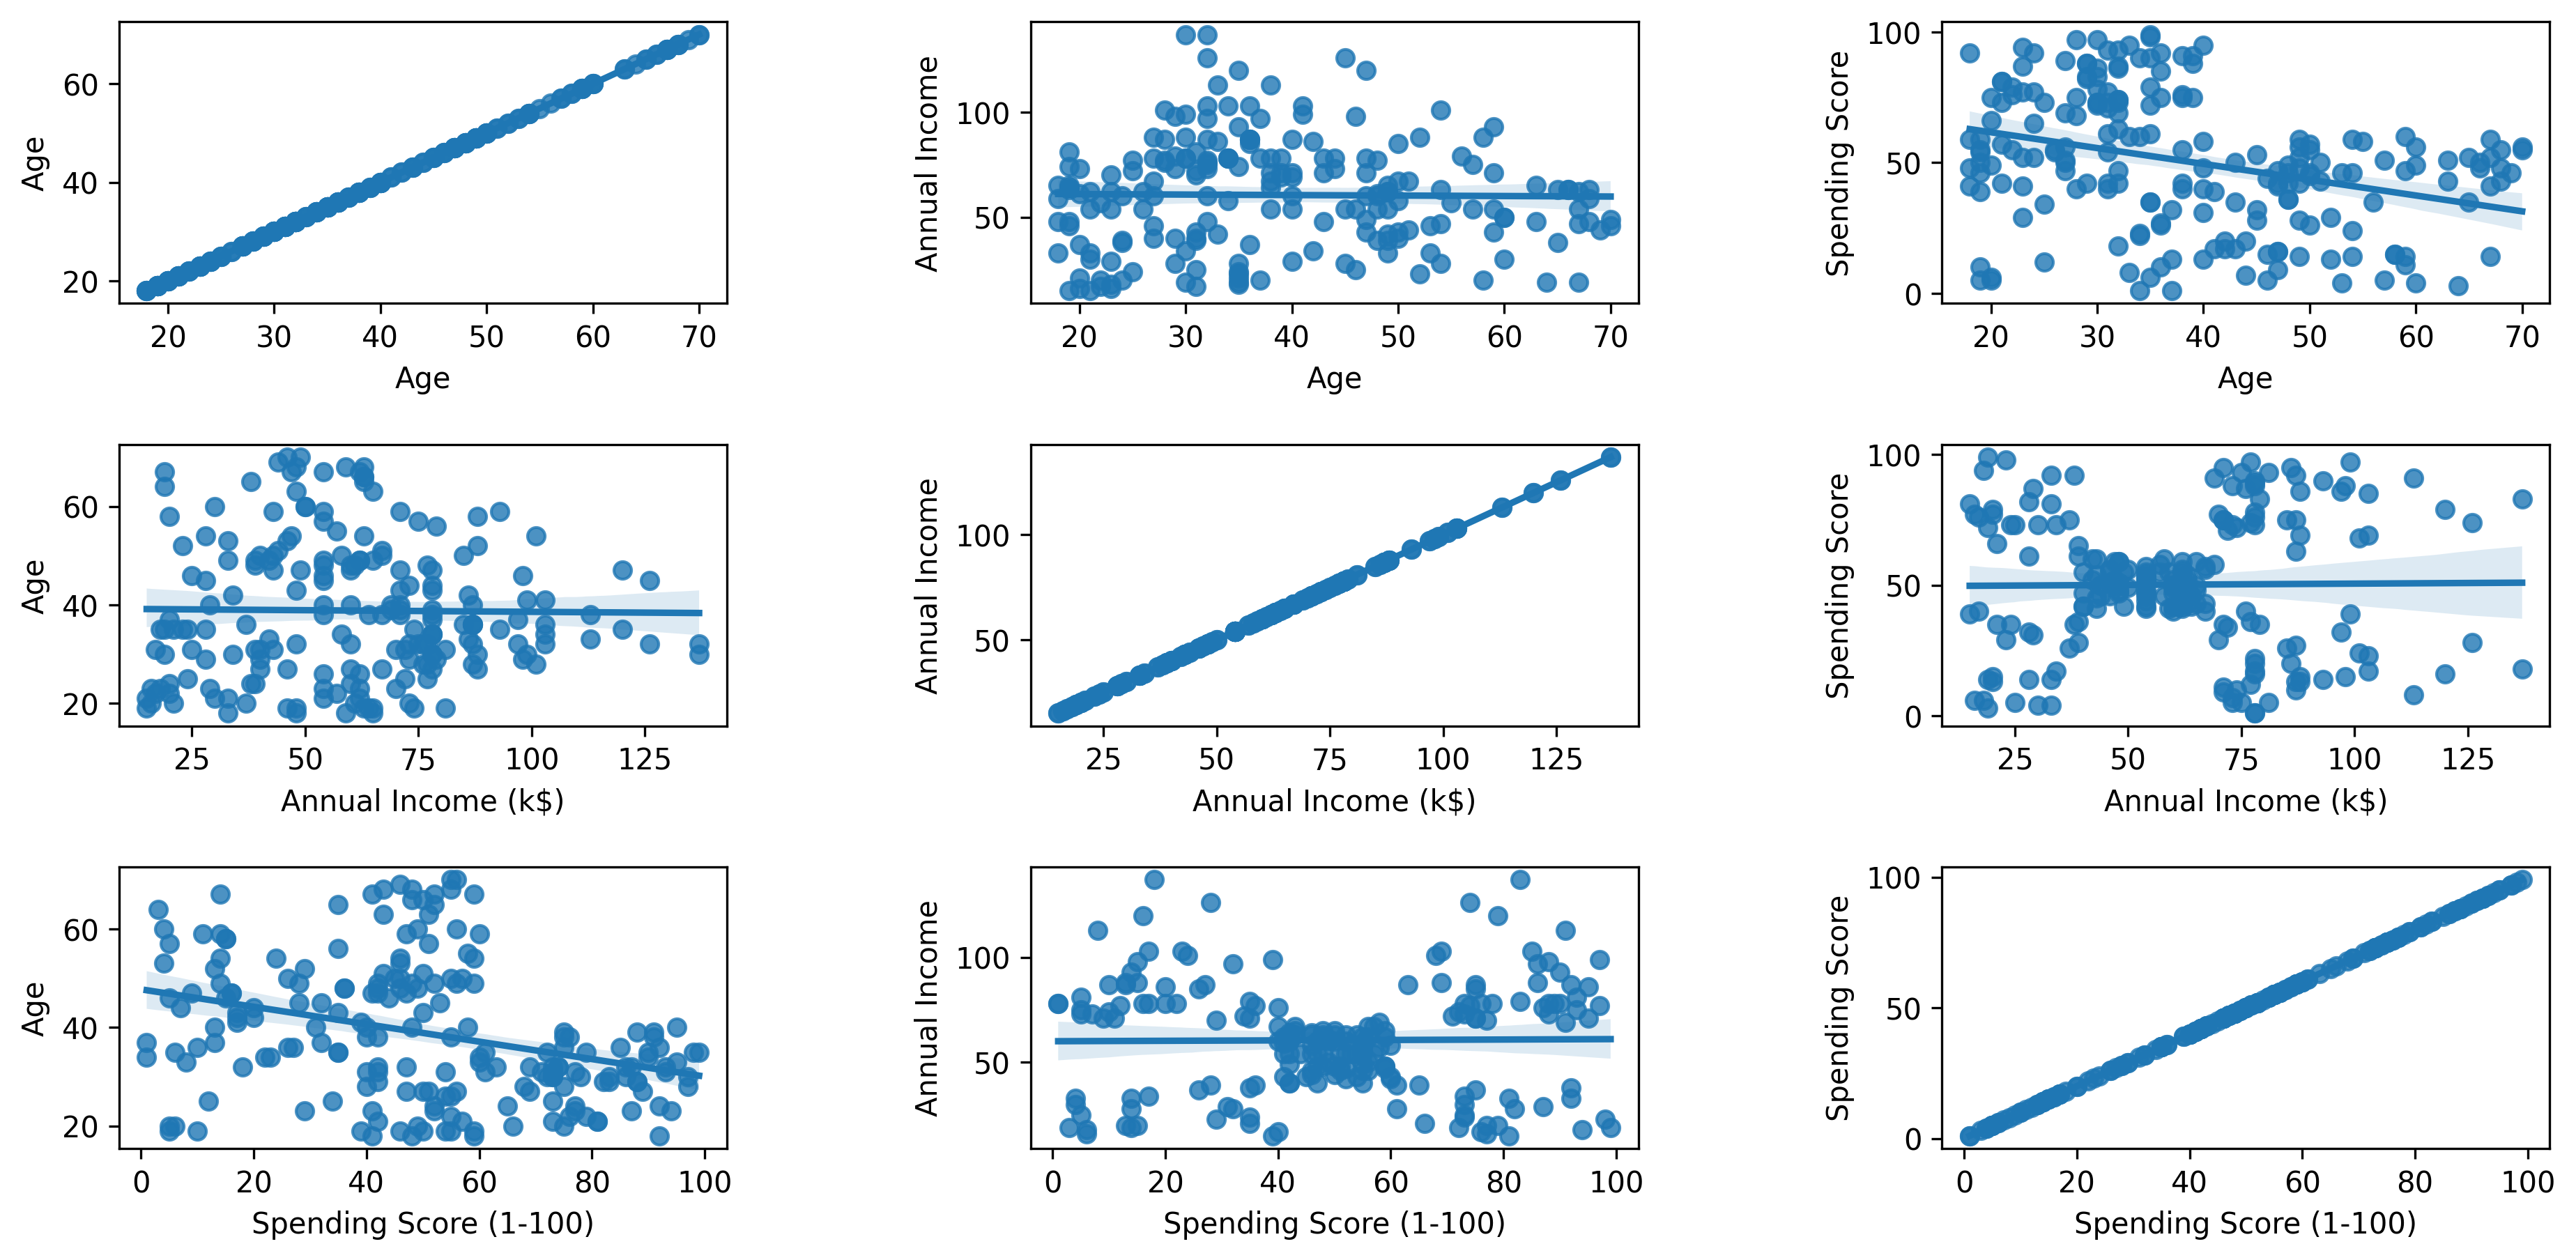

In [126]:
plt.figure(1 , figsize = (15 , 7),dpi=300)
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

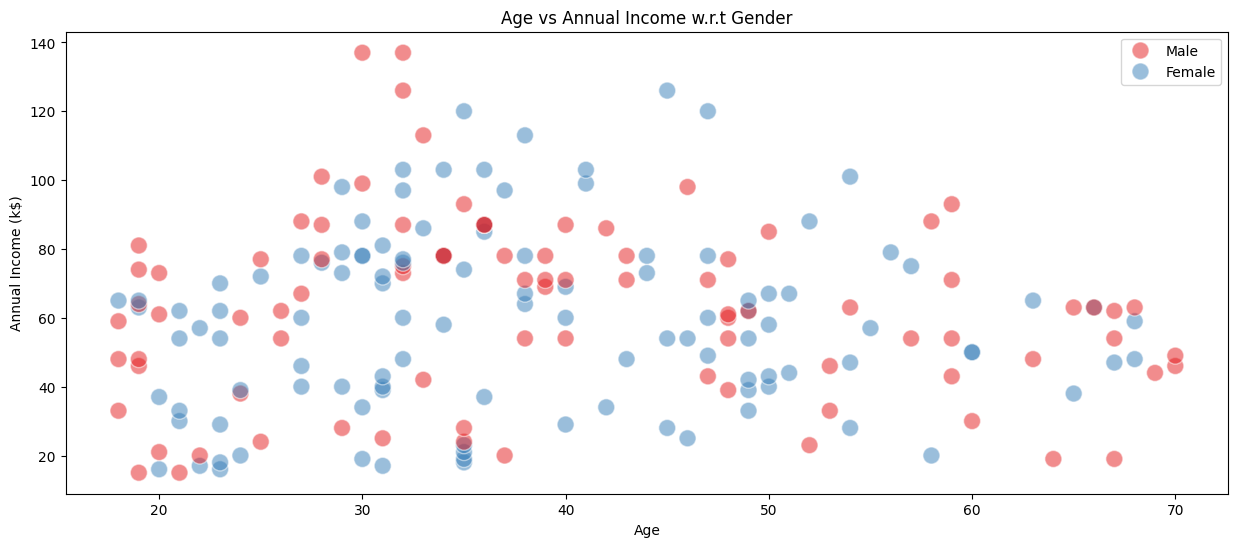

In [136]:
import matplotlib.pyplot as plt

# Create the figure with the desired size
plt.figure(1, figsize=(15, 6))

# Scatter plot for Age vs Annual Income (k$)
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'],data=df, s=150, alpha=0.5,hue='Gender',palette='Set1')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')

# Show legend
plt.legend()

# Display the plot
plt.show()



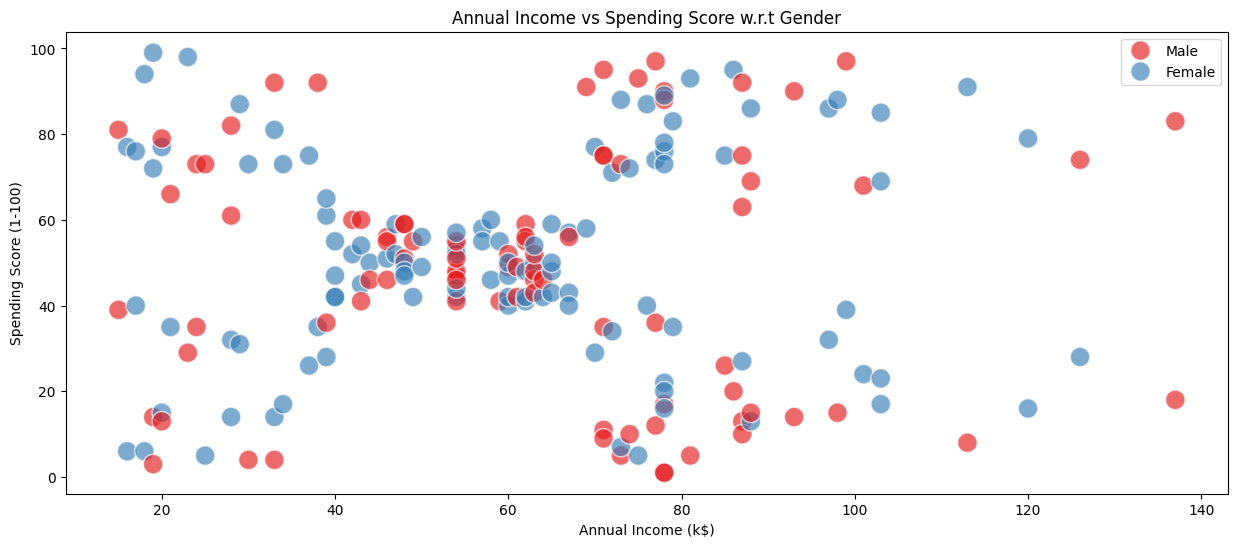

In [144]:
plt.figure(1 , figsize = (15 , 6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df,s = 200 , alpha = 0.65 , hue='Gender',palette='Set1')
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

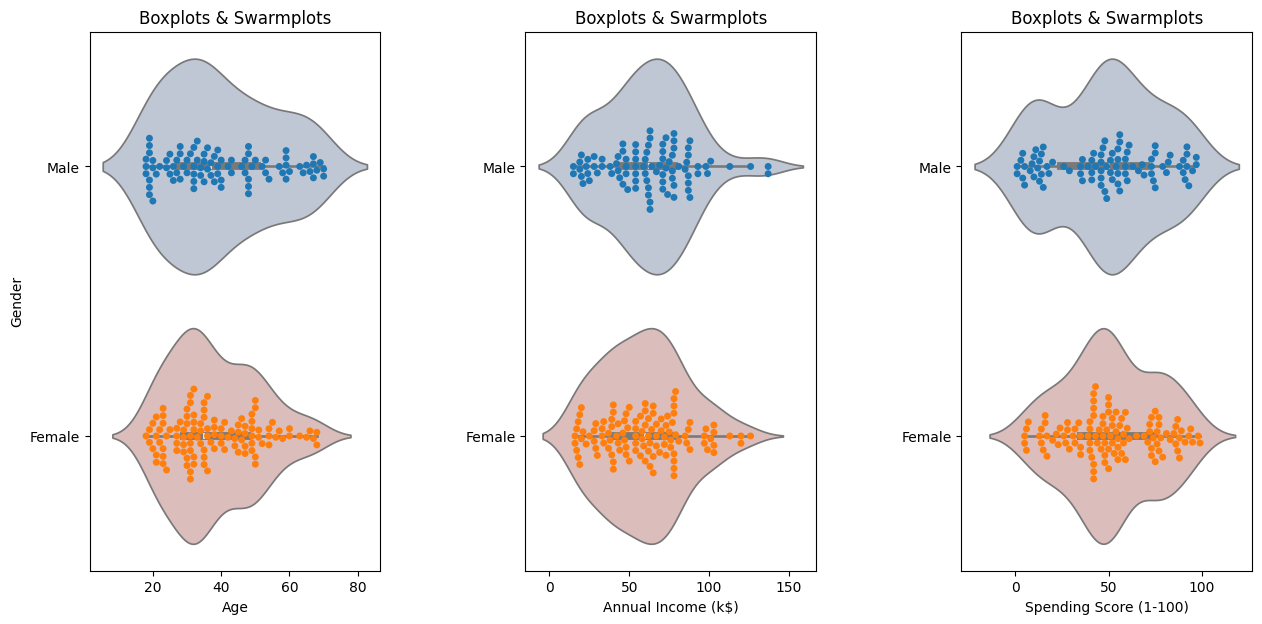

In [152]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag',hue='Gender')
    sns.swarmplot(x = cols , y = 'Gender' , data = df,hue='Gender')
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' )
plt.show()

## Clustering using K- means

1.Segmentation using Age and Spending Score

In [198]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    model = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
    model.fit(X1)
    inertia.append(model.inertia_)

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less

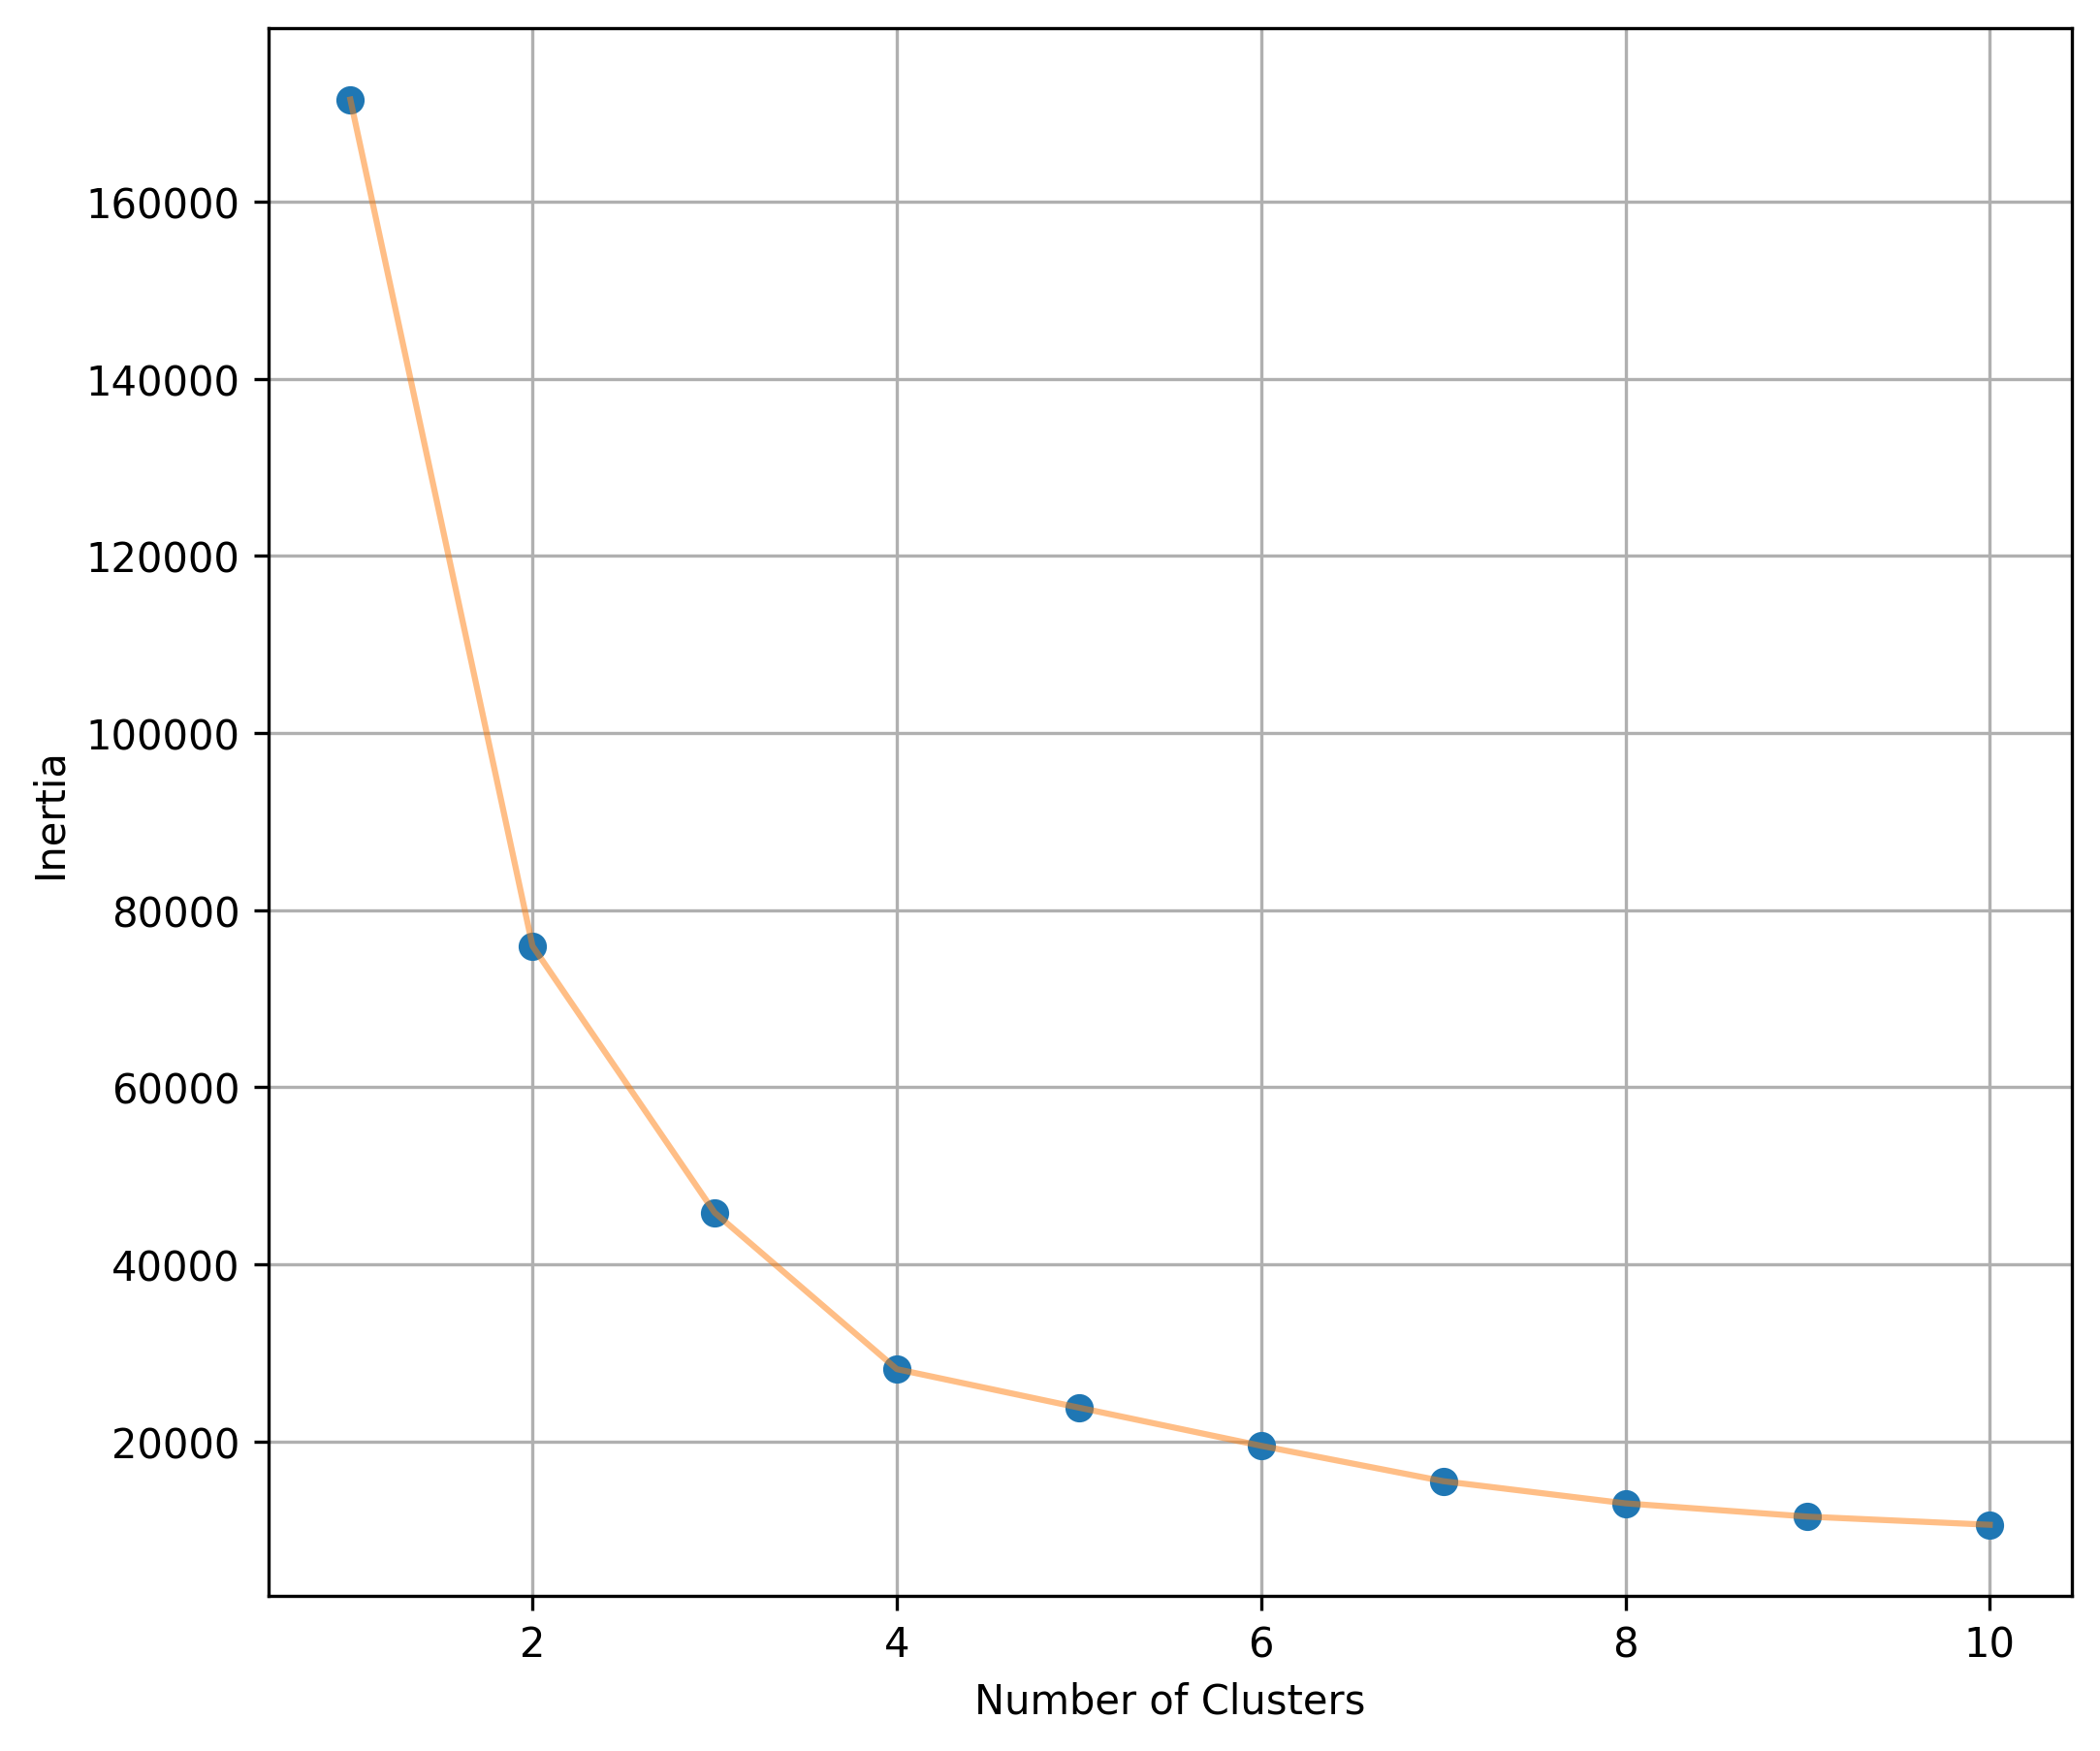

In [199]:
plt.figure(1 , figsize = (8,7),dpi=300)
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [200]:
model = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
model.fit(X1)
labels1 = model.labels_
centroids1 = model.cluster_centers_

In [201]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

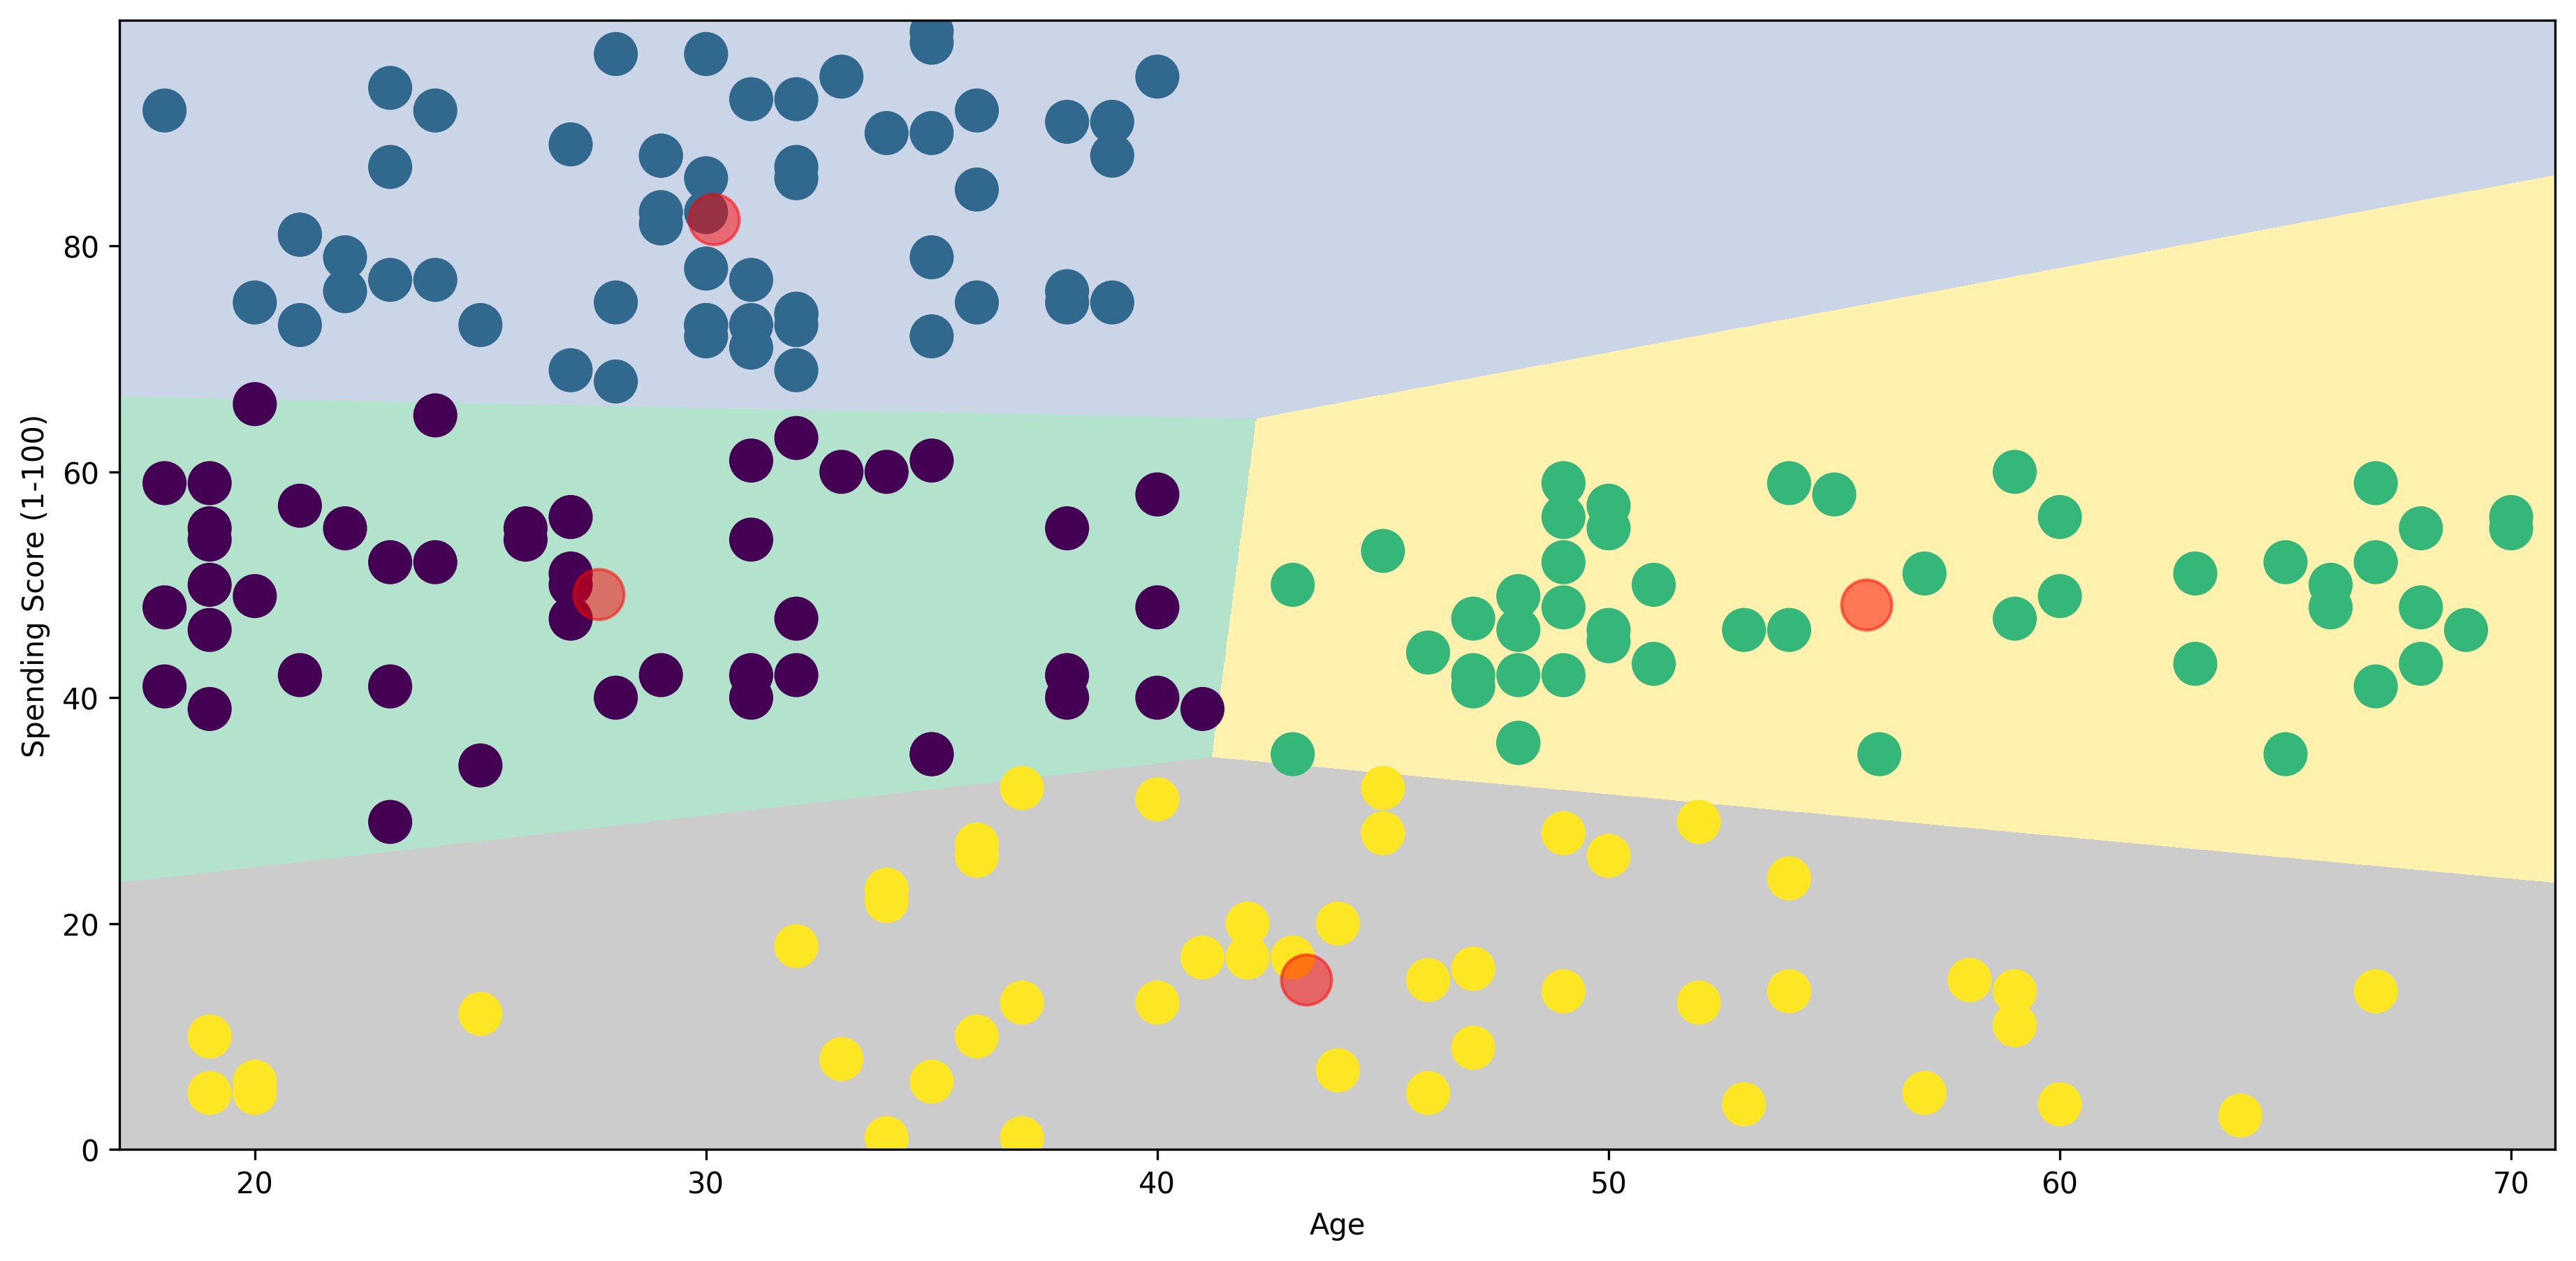

In [202]:
plt.figure(1 , figsize = (15 , 7),dpi=300 )
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### 2. Segmentation using Annual Income and Spending Score

In [203]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    model1 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
    model1.fit(X2)
    inertia.append(model1.inertia_)

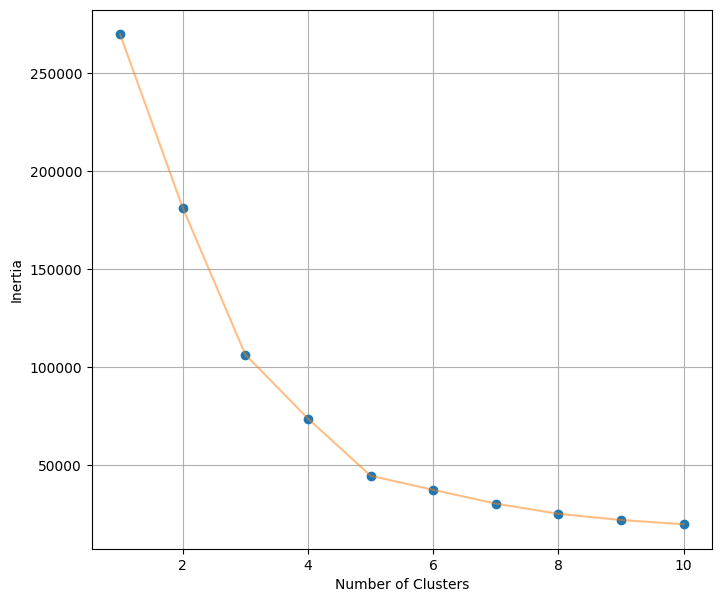

In [204]:
plt.figure(1 , figsize = (8,7))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [205]:
model1 = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111 ) )
model1.fit(X2)
labels2 = model1.labels_
centroids2 = model1.cluster_centers_


In [206]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = model1.predict(np.c_[xx.ravel(), yy.ravel()])

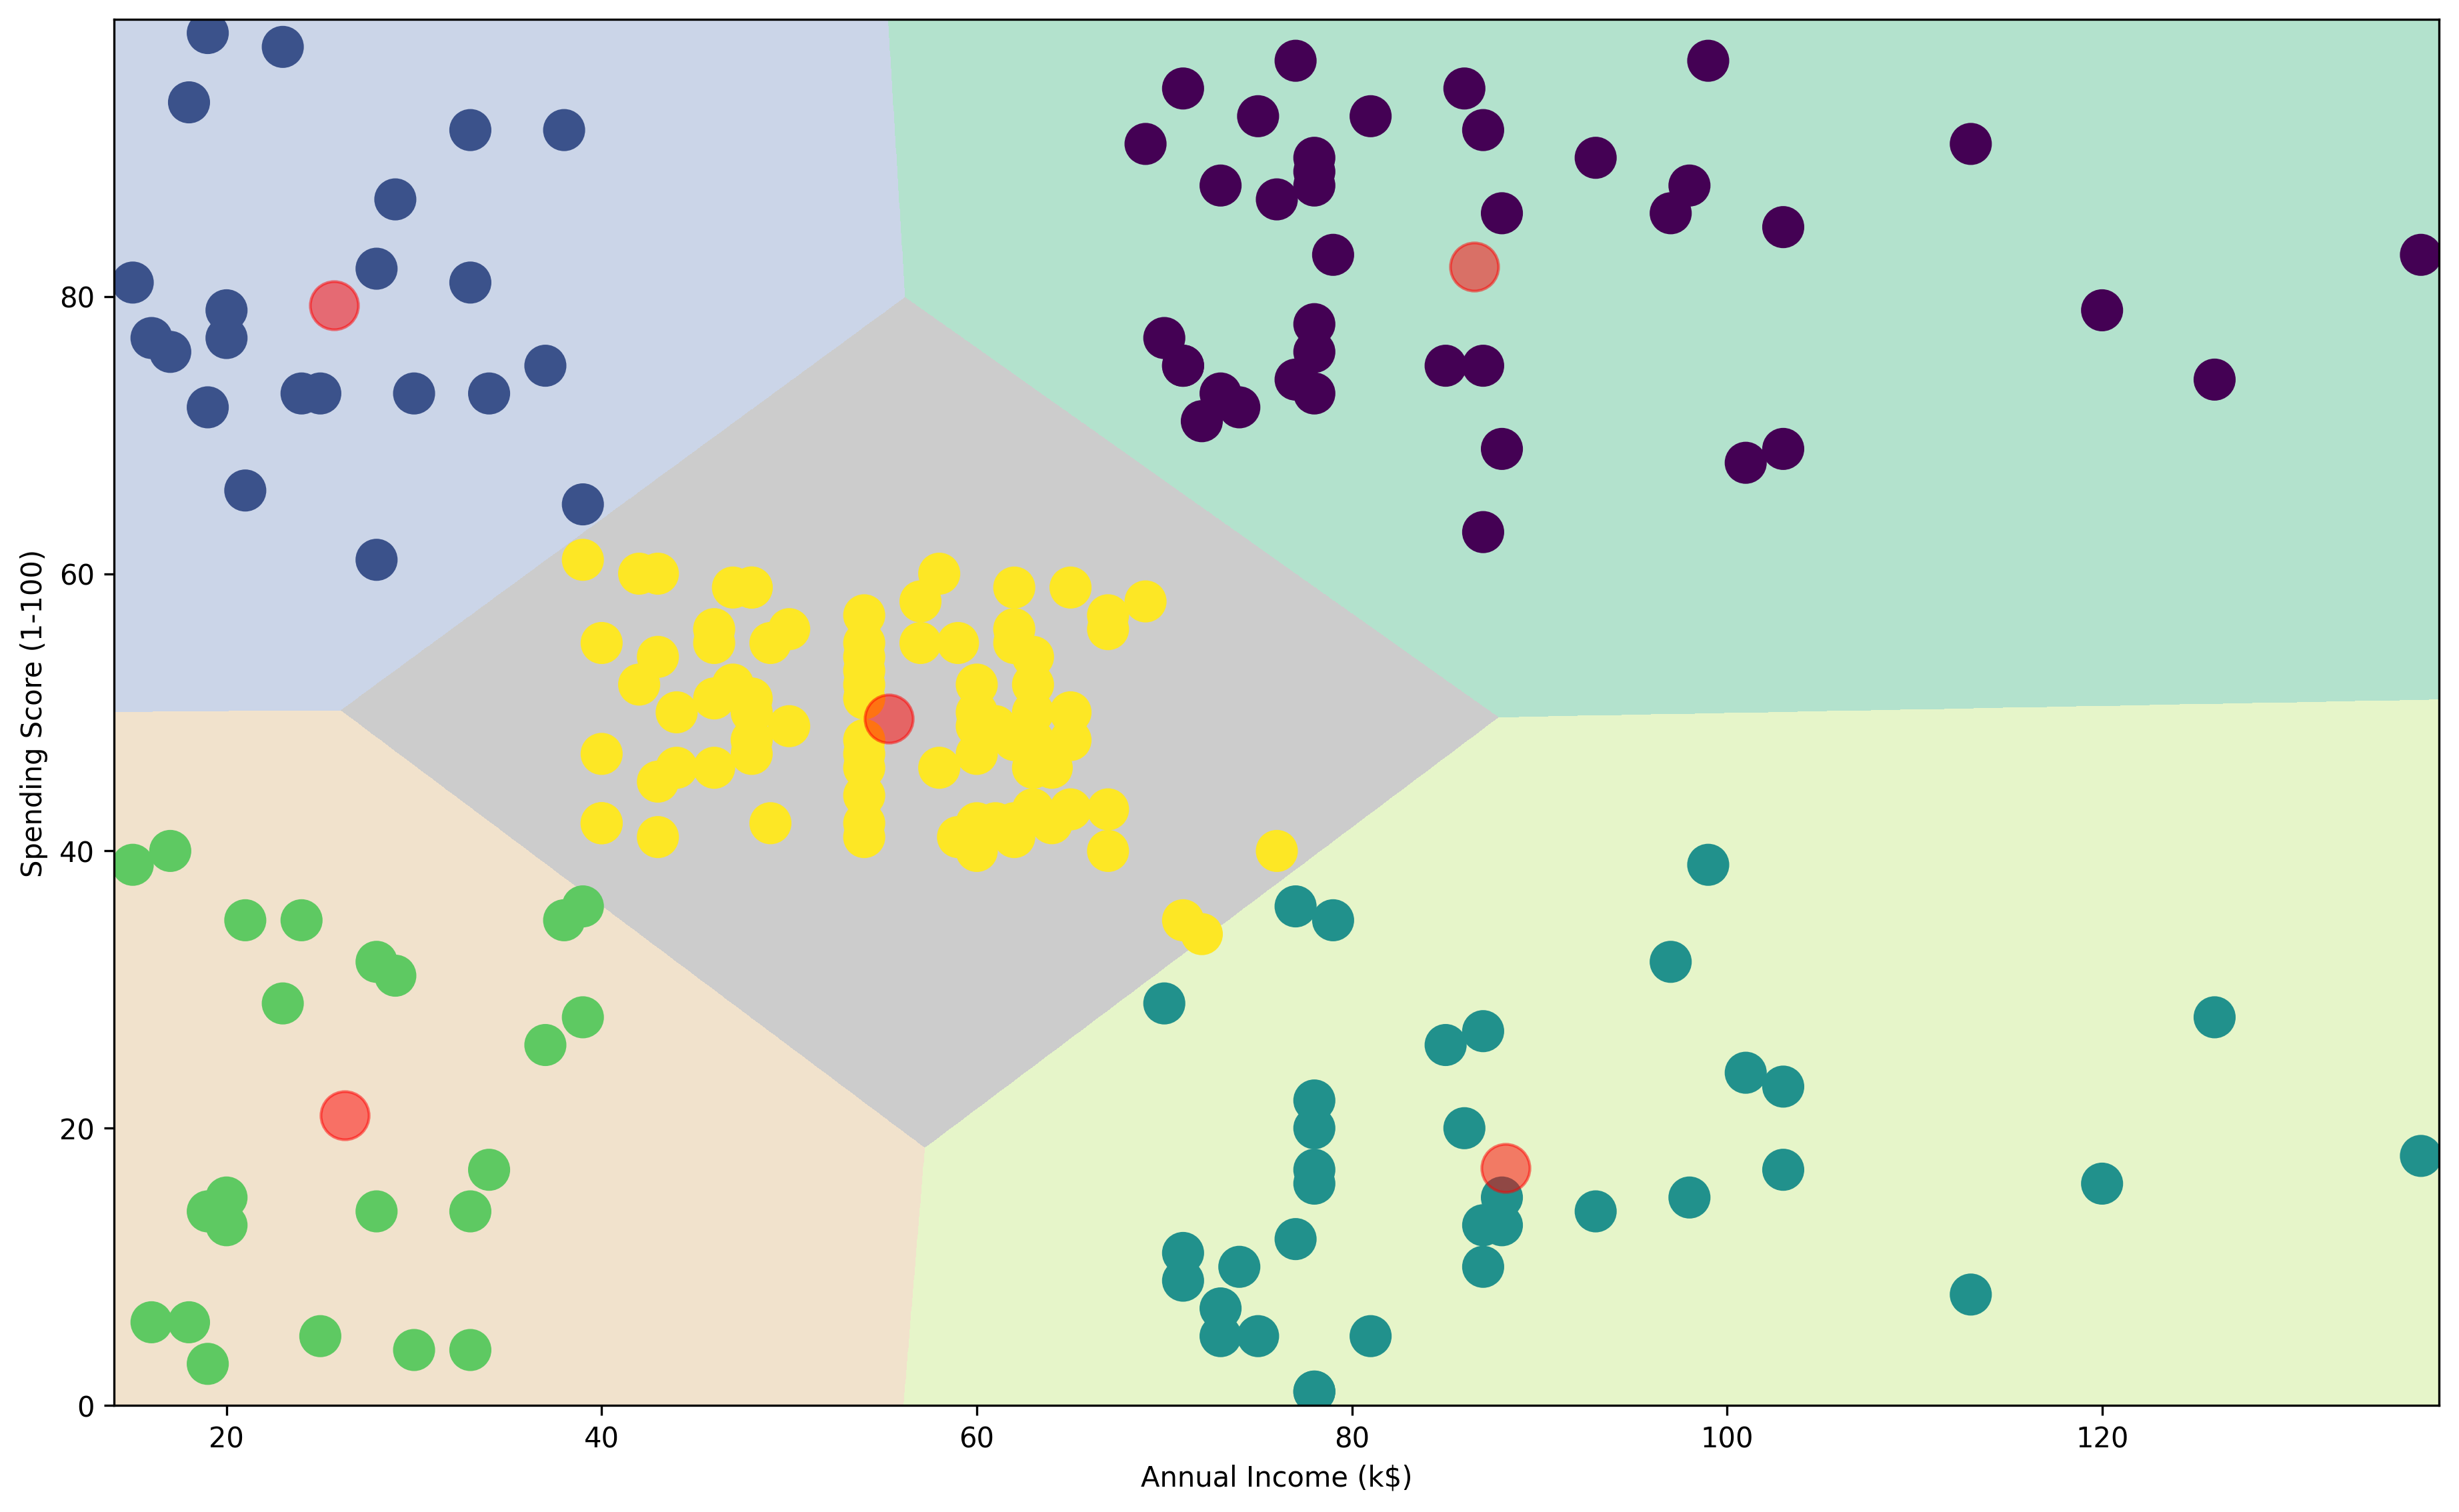

In [208]:
plt.figure(1 , figsize = (15 , 9),dpi=300 )
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [209]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    model2 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
    model2.fit(X3)
    inertia.append(model2.inertia_)

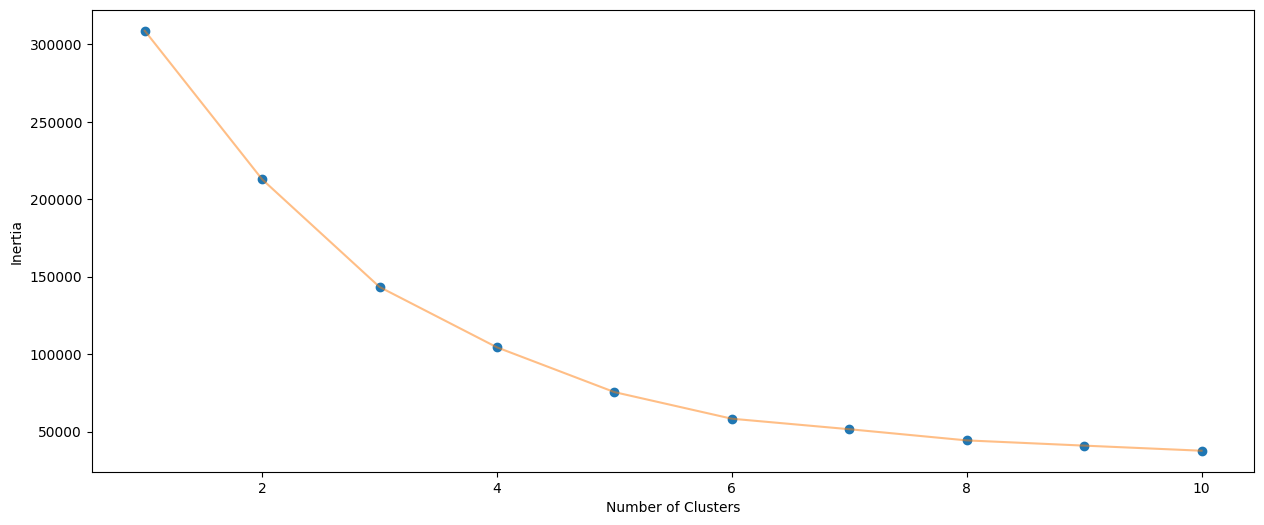

In [210]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [211]:
model2 = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111 ) )
model2.fit(X3)
labels3 = model2.labels_
centroids3 = model2.cluster_centers_

In [212]:
# Select 4 relevant features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

# Convert 'Gender' to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select relevant data
X = df[features]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [215]:
from sklearn.decomposition import PCA

# Applying PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca.head()


,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


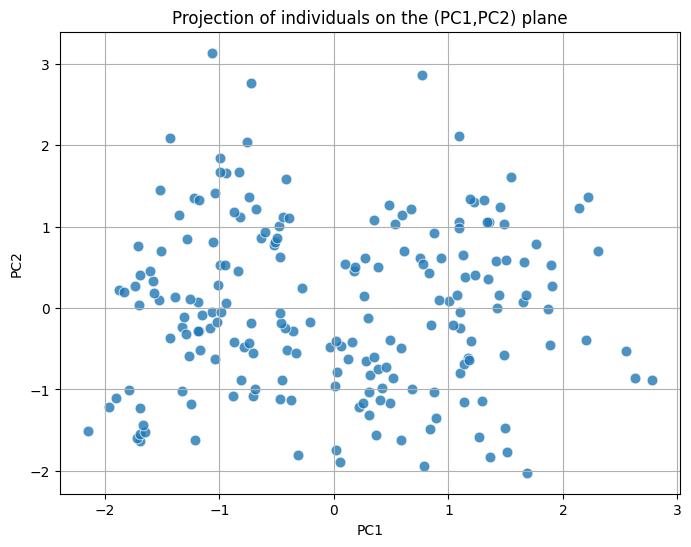

In [218]:
plt.figure(figsize=(8,6))  # Create a figure with the specified size

# Scatter plot using seaborn
sns.scatterplot(x='PC1', y='PC2', data=df_pca, s=60, alpha=0.8)

# Add a title to the plot
plt.title('Projection of individuals on the (PC1,PC2) plane')

# Label the x and y axes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display grid lines for easier interpretation
plt.grid(True)

# Display the plot
plt.show()


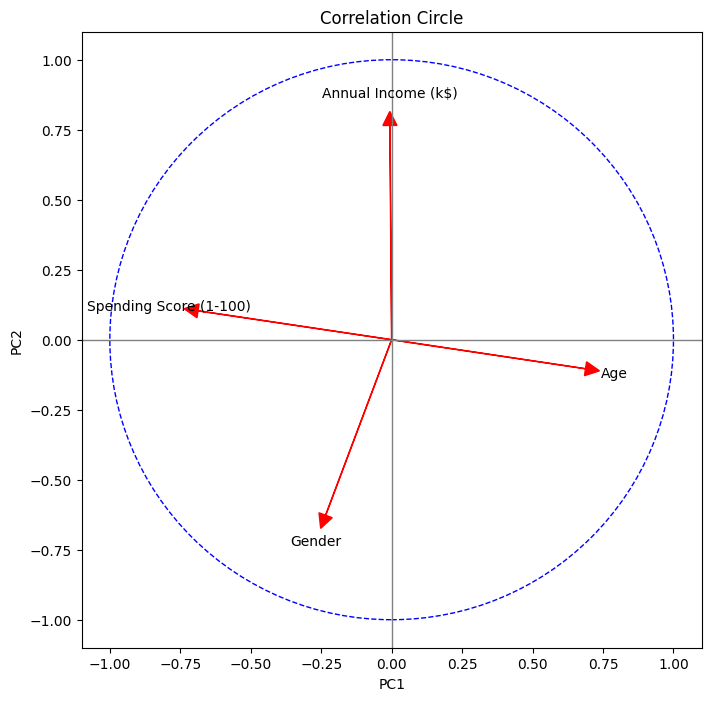

In [221]:
# Correlation Circle
pcs = pca.components_  # Principal components
n_features = X.shape[1]  # Number of features

plt.figure(figsize=(8, 8))

# Loop through each feature to draw arrows representing the components
for i in range(n_features):
    plt.arrow(0, 0, pcs[0, i], pcs[1, i],
              head_width=0.05, head_length=0.05, fc='red', ec='red')  # Draw the arrows
    plt.text(pcs[0, i]*1.15, pcs[1, i]*1.15,
             X.columns[i], color='black', ha='center', va='center')  # Add feature labels

# Unit circle
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', linestyle='--')
plt.gca().add_patch(circle)

# Set plot limits and labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1')  # First principal component
plt.ylabel('PC2')  # Second principal component
plt.title('Correlation Circle')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()


* Age and Spending Score are the most influential features in PC1.

* Annual Income is the dominant feature in PC2.

* Gender is less important in this PCA projection.

In [222]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = clusters

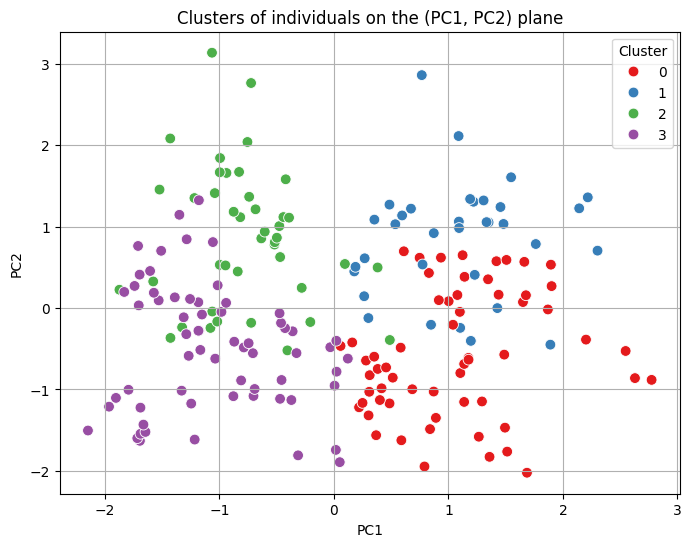

In [225]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=df_pca, s=60)
plt.title('Clusters of individuals on the (PC1, PC2) plane')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()